In [2]:
# Import necessary libraries
import sys
sys.path.append("../")


import random
import math
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from src.perform_database_operations import perform_database_operations
from src.preprocessing import PreprocessingUtils
from src.visualization import VisualizationUtils


## Configuration

In [3]:
config_file_path = '../config_database.json'  # Path to the database configuration file
database_name = 'telecom'  # Name of the database to connect to
sql_query = 'SELECT * FROM xdr_data'  # SQL query to retrieve data

## Data Acquisition

In [4]:
def get_data(config_file_path, database_name, sql_query):
    """Fetches data from the specified database using the provided configuration and query.

    Args:
        config_file_path (str): Path to the JSON file containing database credentials.
        database_name (str): Name of the database to connect to.
        sql_query (str): SQL query to execute for data retrieval.

    Returns:
        pandas.DataFrame: The retrieved data as a pandas DataFrame.
    """

    df = perform_database_operations(config_file_path, database_name, sql_query)
    return df

df = get_data(config_file_path, database_name, sql_query)

## Data Exploration

In [5]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

`Start` and `End` columns datatypes are wrong.

Some of columns have null elements.

## Visualization

In [7]:
visualize = VisualizationUtils()

#### Handset Type Analysis

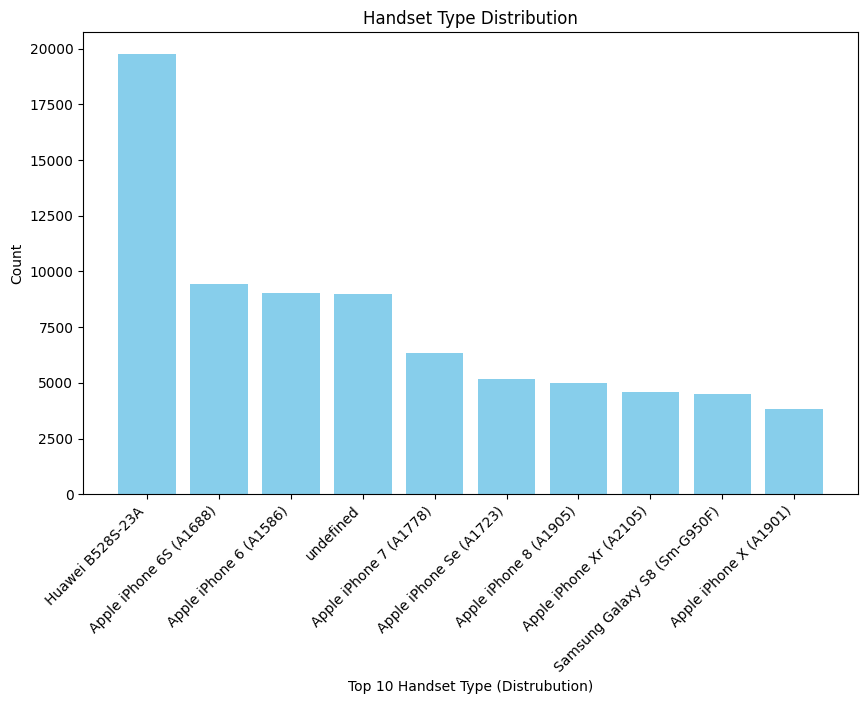

In [8]:
top_10_handset_type = df['Handset Type'].value_counts().head(10)

visualize.plot_bar(top_10_handset_type,
                   xlabel="Top 10 Handset Type (Distrubution)",
                   ylabel='Count',
                   title='Handset Type Distribution')

#### Handset Manufacturer Analysis

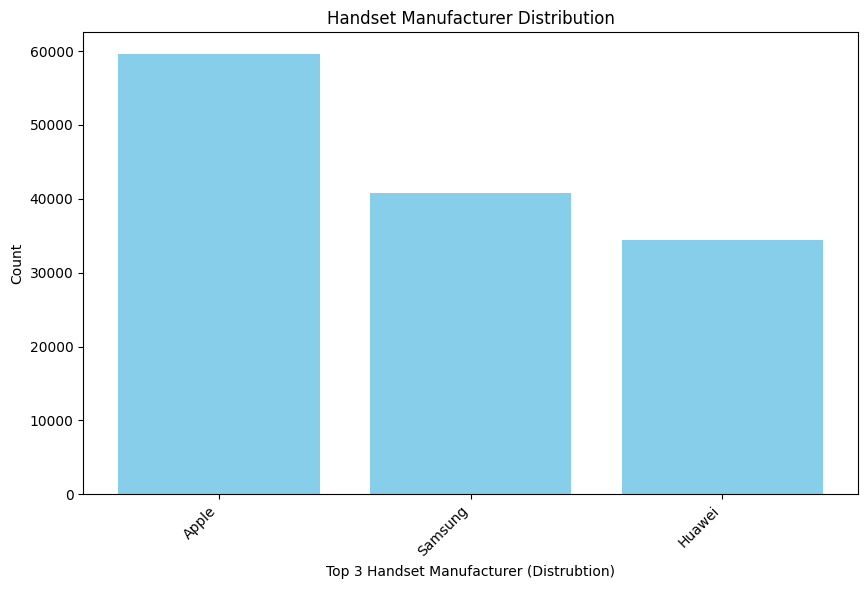

In [9]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)

visualize.plot_bar(top_3_manufacturers,
                   xlabel="Top 3 Handset Manufacturer (Distrubtion)",
                   ylabel='Count',
                   title='Handset Manufacturer Distribution')

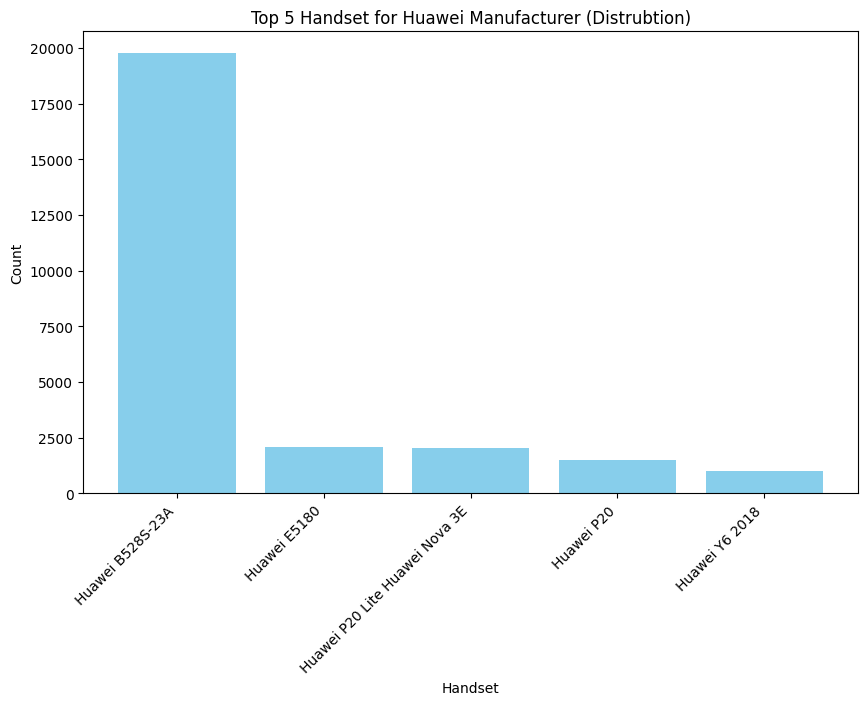

In [10]:
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5_handsets_per_manufacturer[manufacturer] = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

choosen_manufacturer = 'Huawei'
visualize.plot_bar(top_5_handsets_per_manufacturer[choosen_manufacturer],
                   title=f"Top 5 Handset for {choosen_manufacturer} Manufacturer (Distrubtion)",
                   ylabel='Count',
                   xlabel='Handset')

## Numerical Feature Analysis

In [11]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()

In [12]:
def get_numerical_cols_subset(numerical_cols, max_cols=9):
    """Selects a subset of numerical columns, handling cases with less than max_cols columns.

    Args:
        numerical_cols (list): List of all numerical column names.
        max_cols (int, optional): Maximum number of columns to include in the subset. Defaults to 9.

    Returns:
        list: A list of numerical column names for the subset.
    """

    if len(numerical_cols) > max_cols:
        numerical_cols_subset = random.sample(numerical_cols, max_cols)
    else:
        numerical_cols_subset = numerical_cols
    return numerical_cols_subset

numerical_cols_subset = get_numerical_cols_subset(numerical_cols)

#### Distribution Analysis with Histograms

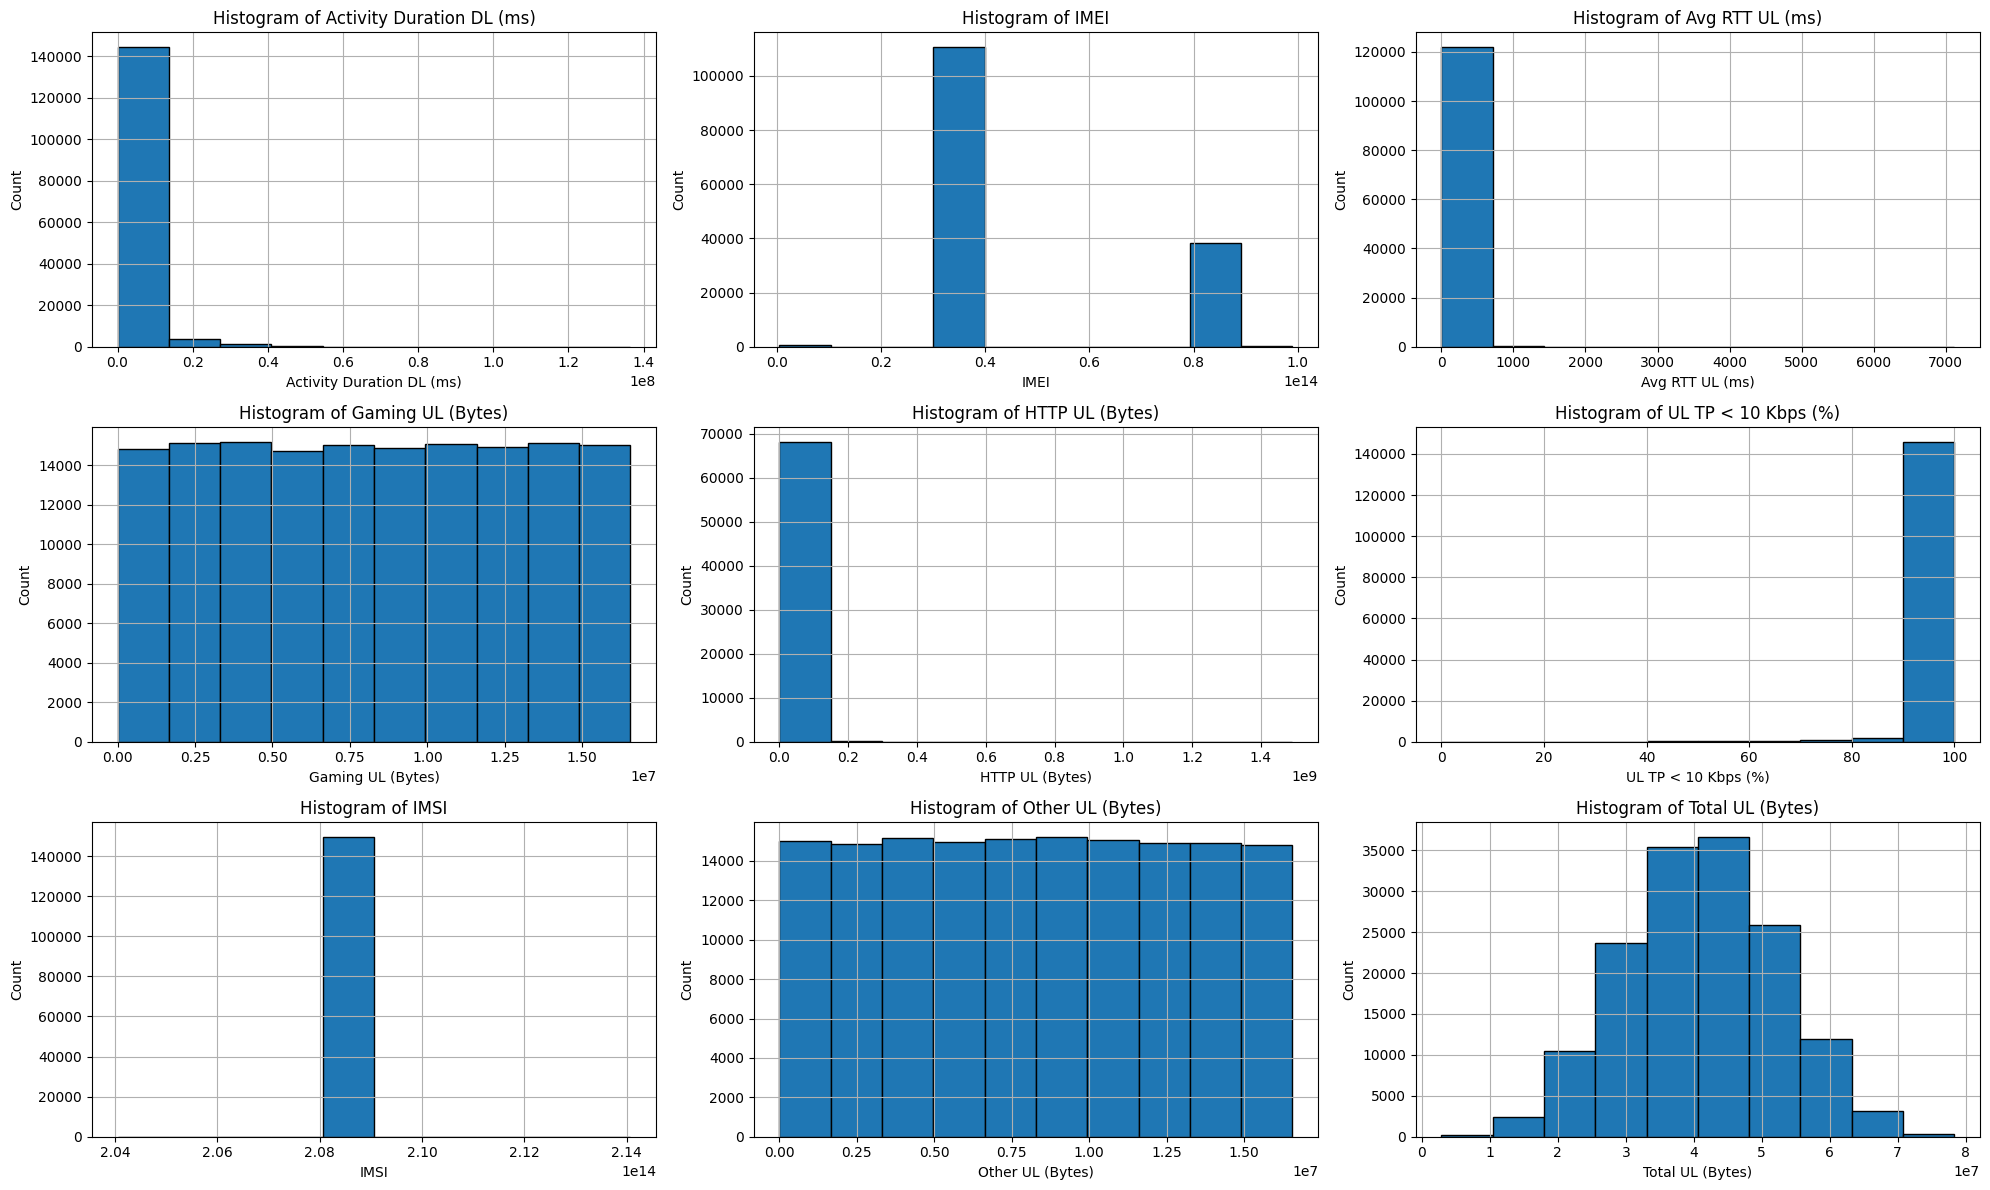

In [15]:
# Calculate grid dimensions based on number of columns in the subset
num_cols = 3  # Choose a fixed number of columns for the subplots
num_rows = math.ceil(len(numerical_cols_subset) / num_cols)

# Create the subplots (fixed grid size)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

for i, col in enumerate(numerical_cols_subset):
    visualize.plot_hist(df, col, ax=axes[i])

# Hide extra subplots (if any)
for j in range(len(numerical_cols_subset), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Outlier Analysis with Boxplots

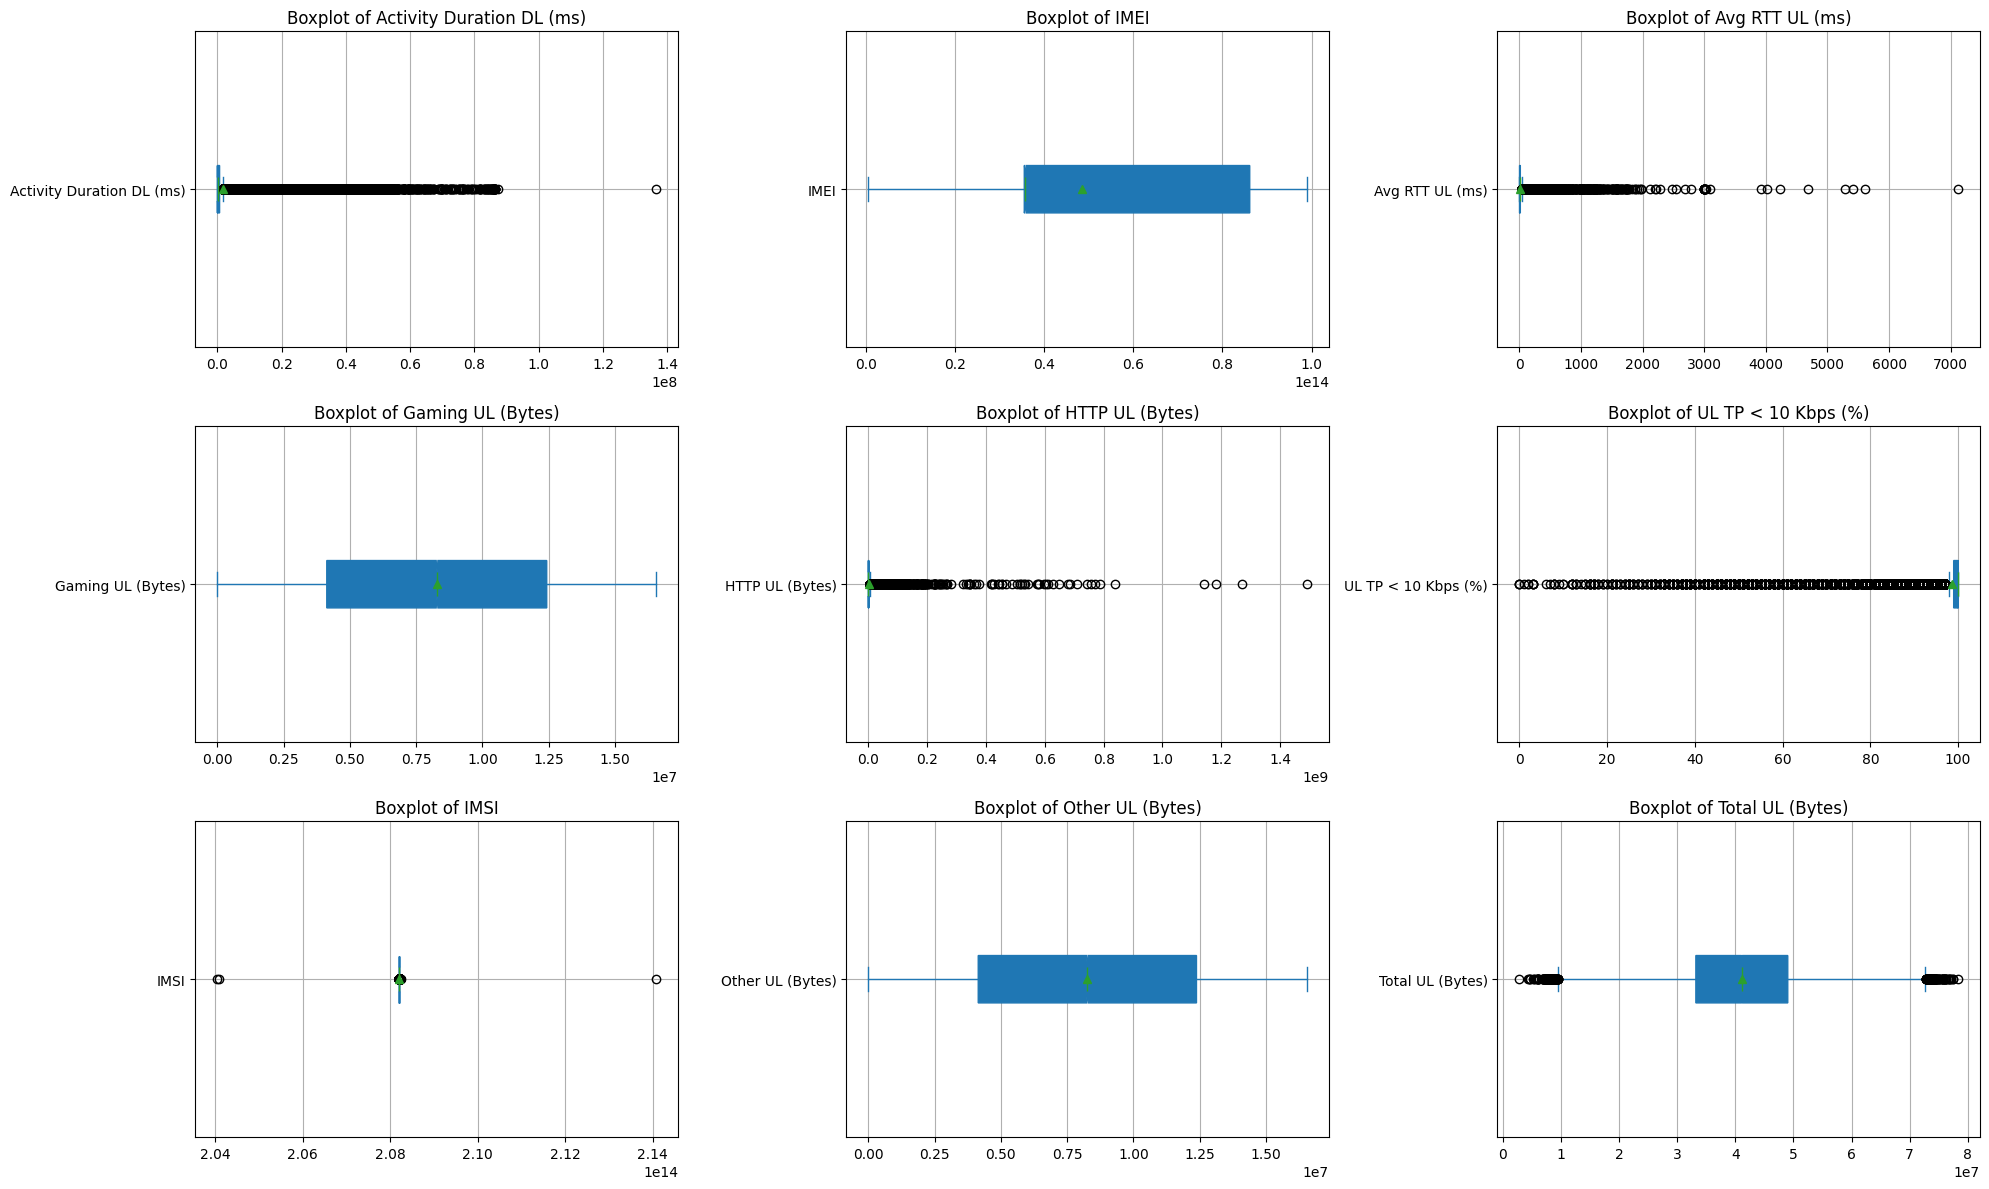

In [16]:
# Calculate grid dimensions based on number of columns in the subset
num_cols = 3  # Choose a fixed number of columns for the subplots
num_rows = math.ceil(len(numerical_cols_subset) / num_cols)

# Create the subplots (fixed grid size)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

for i, col in enumerate(numerical_cols_subset):
    visualize.plot_boxplot(df, col, ax=axes[i])

# Hide extra subplots (if any)
for j in range(len(numerical_cols_subset), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Data Insights

Our initial exploration reveals some interesting details about the dataset:

* **Outliers:** Several numerical columns appear to contain outliers, which are data points that deviate significantly from the majority. These outliers could potentially skew the results of any analysis. We might need to consider strategies to handle them, such as capping outliers, winsorizing, or removal (depending on the context).

* **Missing Values:** We observed columns with a high proportion of missing values (null data points).  Discarding these columns entirely might result in data loss.  Instead, we can explore imputation techniques to fill in these missing values with appropriate estimates based on the remaining data.

* **Data Type Conversion:** Two columns, 'Start' and 'End', likely represent timestamps.  Converting them to datetime data type will enable us to perform temporal analysis and manipulation more effectively.

These findings provide a starting point for data cleaning and preprocessing before diving deeper into analysis.

# Preprocessing